<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/%08Part8/P8_Ch04_CH02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nbformat==5.8.0 nbconvert==7.3.1


# 흑백 -> 컬러이미지 Colorization Task


  ![PFCN dataset](https://www.researchgate.net/profile/Dawei_Li49/publication/334417334/figure/fig4/AS:832930272276492@1575597460956/Sample-images-from-the-PFCN-dataset.jpg)

     위의 이미지는 다음과 같은 것을 보여줍니다.  
    - 800x600의 사람 portrait 이미지  
     - ?????.png  
    - 사람 영역에 대한 흑백 portrait 이미지
     - ?????_matte.png
    - pfcn_original
     - 원본 800x600 이미지들
    - pfcn_small
     - colab용 100x75 이미지들



- 데이터 출처:
 - [PFCN dataset](https://1drv.ms/u/s!ApwdOxIIFBH19Ts5EuFd9gVJrKTo)
 - [pfcn_small](https://drive.google.com/file/d/1_q37TRIFwtwhmSeLu_4h3SkFHrDSjeyl/view?usp=sharing)


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

# 1. EDA

In [3]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [4]:
!ls -al /gdrive/MyDrive/딥러닝_정주행/P8_Ch02.인물사진에서배경없애기

total 161695
-rw------- 1 root root  23713432 Oct 23 10:41 lecture003.h5
-rw------- 1 root root   4572521 Oct 23 10:46 P8_Ch02_CH06,07.ipynb
-rw------- 1 root root 137288603 Oct 12 07:20 pfcn_small.npz


In [6]:
pfcn_small = np.load('/gdrive/MyDrive/딥러닝_정주행/P8_Ch02.인물사진에서배경없애기/pfcn_small.npz')


In [11]:
print(list(pfcn_small.keys()))

train_images = pfcn_small['train_images']
test_images = pfcn_small['test_images']

['train_images', 'test_images', 'train_mattes', 'test_mattes']


In [14]:
train_images[train_images !=0][:10]

array([0.23627451, 0.34803922, 0.64705882, 0.24509804, 0.35686275,
       0.65588235, 0.25490196, 0.36470588, 0.66470588, 0.2372549 ])

In [16]:
print(train_images.dtype)
print(len(train_images))

float64
1700


In [20]:
print(train_images.shape, test_images.shape)
print(len(train_images), len(test_images))


(1700, 100, 75, 3) (300, 100, 75, 3)
1700 300


In [21]:
train_images[train_images !=0]

array([0.23627451, 0.34803922, 0.64705882, ..., 0.05588235, 0.0245098 ,
       0.01470588])

In [22]:
train_images.dtype, test_images.dtype

(dtype('float64'), dtype('float64'))

In [23]:
print(train_images.min())
print(train_images.max())

print('----------------')
print(test_images.min())
print(test_images.max())

0.0
1.0
----------------
0.0
1.0


# 2. 전처리

- train_gray_images, test_gray_images 생성

In [25]:
from skimage import color

train_gray_images = np.array([color.rgb2gray(img).reshape((100, 75, 1)) for img in train_images])
test_gray_images = np.array([color.rgb2gray(img).reshape((100, 75, 1)) for img in test_images])


print(train_gray_images.shape, test_gray_images.shape)

(1700, 100, 75, 1) (300, 100, 75, 1)


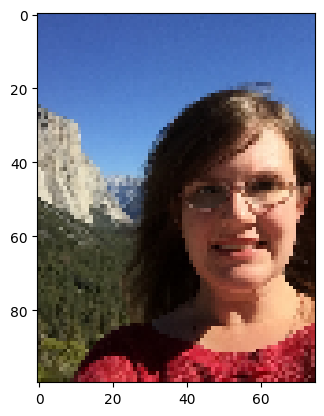

In [30]:
plt.imshow(train_images[0])

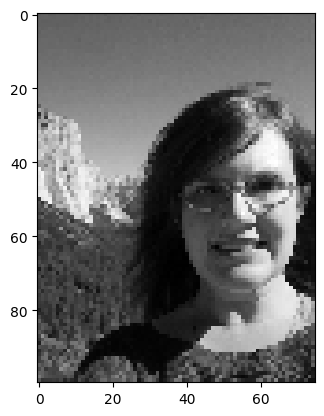

In [31]:
plt.imshow(train_gray_images[0], cmap ='gray')